# North America Roads

This example uses data from [Natural Earth](https://www.naturalearthdata.com/) to plot the road network in North America. Refer to the [data documentation](https://www.naturalearthdata.com/downloads/10m-cultural-vectors/roads/) for more information about this dataset.

## Dependencies

- lonboard
- pyogrio

## Imports

In [1]:
import geopandas as gpd
import palettable.colorbrewer.diverging

from lonboard import PathLayer, viz
from lonboard.colormap import apply_continuous_cmap

The "public" URL for this dataset from the Natural Earth website is
```
https://www.naturalearthdata.com/http//www.naturalearthdata.com/download/10m/cultural/ne_10m_roads_north_america.zip
```
That doesn't appear to work directly inside a notebook, so we'll use the URL the above redirects to:

```
https://naciscdn.org/naturalearth/10m/cultural/ne_10m_roads_north_america.zip
```

It's possible this "private" URL will change in the future.

In [2]:
url = 'https://naciscdn.org/naturalearth/10m/cultural/ne_10m_roads_north_america.zip'

We'll use GeoPandas to fetch this data (45MB) over the internet and load it into a `GeoDataFrame`. This uses the [`pyogrio` engine](https://geopandas.org/en/stable/docs/reference/api/geopandas.read_file.html), which is faster. Ensure you have [`pyogrio`](https://github.com/geopandas/pyogrio) installed. 

In [3]:
gdf = gpd.read_file(url, engine="pyogrio")

This dataframe has a variety of attributes, plus a geometry column with a `LineString` type.

In [4]:
gdf.head()

,prefix,number,class,type,divided,country,state,note,scalerank,uident,length,rank,continent,geometry
0,None,None,Other,Unpaved,None,United States,California,None,12,0,10.373500,0,North America,"LINESTRING (-119.63954 37.85634, -119.63954 37..."
1,None,None,Other,Other Paved,None,United States,Nevada,None,12,1,2.307760,0,North America,"LINESTRING (-119.76779 39.14514, -119.74707 39..."
2,None,S2,Other,Other Paved,None,Mexico,None,None,11,2,92.178100,-1,North America,"LINESTRING (-116.47485 33.09658, -116.46246 33..."
3,None,S1,Other,Other Paved,None,United States,California,None,11,3,46.124100,0,North America,"LINESTRING (-116.56070 33.01205, -116.55359 33..."
4,None,S1,Other,Secondary,Undivided,United States,California,None,10,4,0.305463,0,North America,"LINESTRING (-116.50827 32.81225, -116.50820 32..."


To ensure that this demo is snappy on most computers, we'll filter to only the contiguous U.S. If you're on a recent computer, feel free to comment out this line.

In [5]:
gdf = gdf[gdf["state"] == "California"]

First, just to see what the data looks like, we'll pass some default parameters:

In [6]:
map_ = viz(gdf.geometry, width_min_pixels=0.8)
map_

PathLayer(table=pyarrow.Table
__index_level_0__: int64
geometry: list<item: list<item: fixed_size_list<item: d…

This map object is a [`PathLayer`](https://developmentseed.org/lonboard/api/layers/path-layer/) type. You could have created the same map by using

```py
map_ = lonboard.PathLayer.from_geopandas(gdf)
```

In [7]:
type(map_)

lonboard.layer.PathLayer

We can look at the [documentation for `PathLayer`](https://developmentseed.org/lonboard/api/layers/path-layer/) to see what other rendering options it allows. Let's set the path color to something other than black:

In [8]:
map_.get_color = [200, 0, 200]

Ok, so we can see the data! That's great! But let's customize the rendering based on an attribute!

The `scalerank` column tells how important the road is in the road network. Let's see what the distribution of values is for this column:

In [9]:
gdf['scalerank'].value_counts().sort_index()

scalerank
3       19
4       93
5       35
6       94
7      178
8      122
9        1
10     237
11     541
12    1562
Name: count, dtype: int64

Ok, so the values range from `3` to `12`. To assign a colormap to this column, we need "normalized" values that span between 0 and 1:

In [10]:
normalized_scale_rank = (gdf['scalerank'] - 3) / 9

The values of this array now range from 0 to 1:

In [11]:
normalized_scale_rank.min(), normalized_scale_rank.max()

(0.0, 1.0)

Let's select a colormap to apply to this data:

In [12]:
cmap = palettable.colorbrewer.diverging.PuOr_10

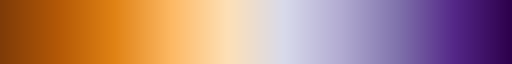

In [13]:
cmap.mpl_colormap

Now we'll use `apply_continuous_cmap` onto this array to generate colors for our data. Just set this new array onto the existing map, and you'll see the map update with the new colors!

In [14]:
map_.get_color = apply_continuous_cmap(normalized_scale_rank, palettable.colorbrewer.diverging.PuOr_10, alpha=0.8)